<a href="https://colab.research.google.com/github/lunacandido/deep_learning_pytorch_luna_cursoalura/blob/main/redeneuralconvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classificando imagens

9
<class 'torch.Tensor'> None
torch.Size([1, 28, 28])


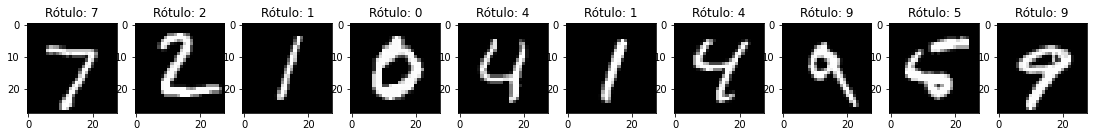

In [5]:
## importando os pacotes para reconhecer os numeros do MNIST
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np  # permite trabalhar com estruturas ndarrays
import torch  
from torchvision import datasets, transforms ## pacote para imagens
# dataset tirado do site - https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.MNIST
MNIST = datasets.MNIST('./' ,
                       train=False,
                      download=True,
                      transform=transforms.ToTensor())
dado, rotulo = MNIST[7]
print(type(dado), print(rotulo))
print(dado.size()) 
#torch.Size([1, 28, 28])
# 1 é a quantidade de cor
# imagem tamanho 28x28
# 9 é o num associado ao elemento [7] do banco de dados

fig, axs = plt.subplots(1,10, figsize=(19, 19))
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0], cmap='gray')
  axs[i].set_title('Rótulo: ' + str(rotulo)) ## adiciona o rótulo
plt.show()
     

Detecção de imagens

In [15]:
import torch 
from torchvision import datasets, transforms

VOC = datasets.VOCDetection('./', 
                                        image_set = 'train',
                                        download=True,
                                        transform = transforms.ToTensor())


  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to ./


<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 308, 500])


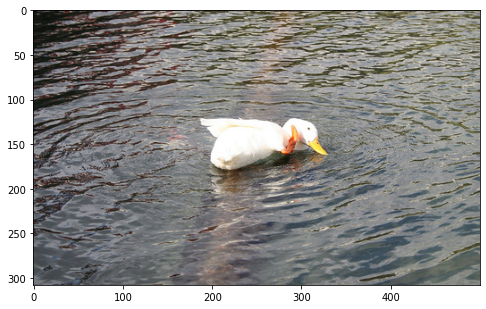

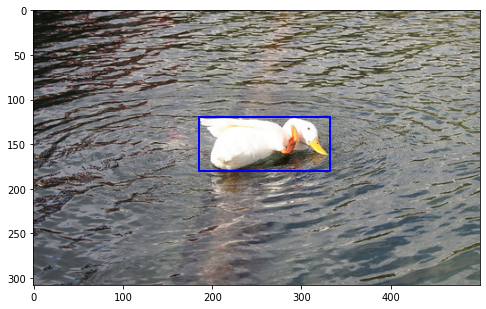

In [36]:
dado, rotulo = VOC[27]
print(type(dado), type(rotulo))
print(dado.size())
dado = dado.permute(1, 2, 0)

plt.figure(figsize=(8, 7) )
plt.imshow(dado)
plt.show()
     
rotulo

bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax']) 
xmin = int(bbox['xmin']) 
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(dado)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=2, edgecolor='b')
ax.add_patch(rect)

plt.show()

Segmentação de imagens

In [38]:
## em vez de definir retangulos onde contém o objeto de interesse 
# a segmentação faz uma rotulação densa à nivel de pixel | detalhes mais ricos

VOCs = datasets.VOCSegmentation('./', 
                             image_set='val', 
                             download=True, 
                             transform=transforms.ToTensor(),
                             target_transform=transforms.ToTensor())

dado, rotulo = VOCs[0]
print(type(dado), type(rotulo))

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to ./
<class 'torch.Tensor'> <class 'torch.Tensor'>


torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


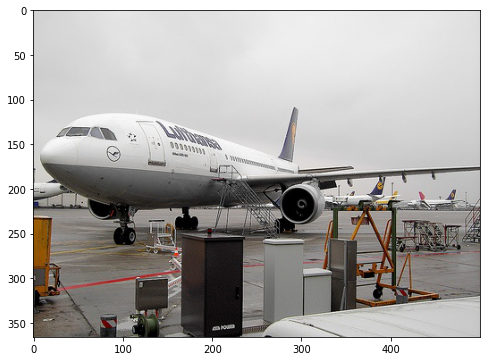

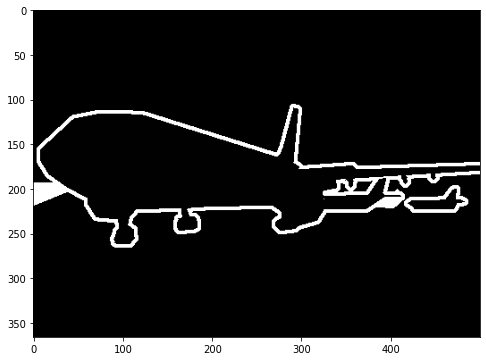

In [43]:
print(dado.size(), rotulo.size())
#dado é colorido já o rótulo é preto ou branco
dado = dado.permute(1, 2, 0)

plt.figure(figsize=(8, 7) )
plt.imshow(dado)

plt.figure(figsize=(8, 7) )
plt.imshow(rotulo[0], cmap= 'gray')

plt.show()

## detalhe aqui só tem mapeamento da borda do objeto